

Welcome!

Through Tensorflow, a deep learning framework that will allow us to build neural networks more easily. Machine learning frameworks like TensorFlow can speed up the machine learning development significantly. In this proect, I am going to do the following in TensorFlow: 

- Initializing variables
- Starting the session
- Training algorithms 
- Implementing a Neural Network

Programing frameworks can not only shorten the coding time, but sometimes also perform optimizations that speed up the code. 


To start, we will import the library:


In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict    # a tf_utils file that contains all the Required functions for this project

%matplotlib inline
np.random.seed(1)

Instructions for updating:
non-resource variables are not supported in the long term


Now that we have imported the library, we will walk through its different applications. We will start with an example, where we compute the loss of one training example. 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

# 2 - Building neural network in tensorflow

In this part of the taskn I will build a neural network using tensorflow. Remember that there are two parts to implement a tensorflow model:

- Creating the computation graph
- Run the graph

Let's delve into the dataset I wound like to solve!

### SIGNS Dataset

This dataset teach our computers to decipher sign language. The datset is about taking pictures in front of a white wall. It helps to build an algorithm that would facilitate communications from a speech-impaired person to someone who doesn't understand sign language.

- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs.

Here are examples for each number, and how an explanation of how I represent the labels. These are the original pictures, before I lowered the image resolutoion to 64 by 64 pixels.
<img src="hands.png" style="width:800px;height:350px;"><caption><center> <u><font color='purple'> **Figure 1**</u><font color='purple'>: SIGNS dataset <br> <font color='black'> </center>


Run the following code to load the dataset.

In [2]:
# Loading the dataset
def load_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Change the index below and run the cell to visualize some examples in the dataset.

y = 5


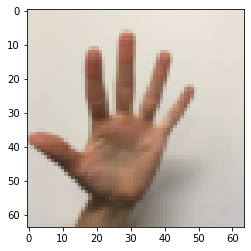

In [3]:
# Example of a picture
index = 3
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

As usual I am  flattening the image dataset, then normalize it by dividing by 255. On top of that, I will convert each label to a one-hot vector as shown in Figure 1. 

Run the cell below to do so.

In [4]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


**Note** that 12288 comes from $64 \times 64 \times 3$. Each image is square, 64 by 64 pixels, and 3 is for the RGB colors. I am just making sure that all these shapes make sense before I continuing.

**My goal** is to build an algorithm capable of recognizing a sign with high accuracy. To do so, I am going to build a tensorflow model that is almost the same as one I have previously built in numpy for cat recognition (but now using a softmax output). It is a great opportunity to compare my numpy implementation to the tensorflow one. 

**The model** is *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

### Creating placeholders

My first task is to create placeholders for `X` and `Y`. This will allow me to later pass my training data in when I run the session. 

 Below, I am implementing the function below to create the placeholders in tensorflow.

In [5]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    """

      
    X = tf.compat.v1.placeholder(shape=[n_x, None],dtype=tf.float32)  
    Y = tf.compat.v1.placeholder(shape=[n_y, None],dtype=tf.float32)  
      
    
    return X, Y

In [6]:
# printing the data inputs
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(6, ?), dtype=float32)


### Initializing the parameters

My second task is to initialize the parameters in tensorflow.

In this task I am going to implementing the function below to initialize the parameters in tensorflow. I am going use Xavier Initialization for weights and Zero Initialization for biases. The shapes are given below. As an example, to help to understand more, for W1 and b1 I am using: 

```python
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
```


In [7]:
# GRADED FUNCTION: initialize_parameters
#import os
#from settings import PROJECT_ROOT
#tf.config.experimental_connect_to_host('grpc://' + os.environ['COLAB_TPU_ADDR'])

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.compat.v1.set_random_seed(1)                   
        
      
    W1 = tf.compat.v1.get_variable("W1", [25,12288])  
    b1 = tf.compat.v1.get_variable("b1", [25,1])  
    W2 = tf.compat.v1.get_variable("W2", [12,25])  
    b2 = tf.compat.v1.get_variable("b2", [12,1])  
    W3 = tf.compat.v1.get_variable("W3", [6,12])  
    b3 = tf.compat.v1.get_variable("b3", [6,1])  
    

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [8]:
tf.compat.v1.reset_default_graph()
with tf.compat.v1.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


As expected, the parameters haven't been evaluated yet.

### Forward propagation in tensorflow 

Now I am going to implementing the forward propagation module in tensorflow. The function will take in a dictionary of parameters and it will complete the forward pass. Below are the functions that I am going to use: 

- `tf.add(...,...)` to do an addition
- `tf.matmul(...,...)` to do a matrix multiplication
- `tf.nn.relu(...)` to apply the ReLU activation

Implementing the forward pass of the neural network. I have commented for the numpy equivalents so that I can compare the tensorflow implementation to numpy. It is important to note that the forward propagation stops at `z3`. The reason is that in tensorflow the last linear layer output is given as input to the function computing the loss. Therefore, I don't need `a3`!



In [9]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
                  # Numpy Equivalents:  
    Z1 = tf.add(tf.matmul(W1,X),b1)                                              # Z1 = np.dot(W1, X) + b1  
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)  
    Z2 = tf.add(tf.matmul(W2,A1),b2)                                              # Z2 = np.dot(W2, a1) + b2  
    A2 = tf.nn.relu(Z2)                                              # A2 = relu(Z2)  
    Z3 = tf.add(tf.matmul(W3,A2),b3)                                              # Z3 = np.dot(W3,Z2) + b3  
     
    
    return Z3

In [10]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


We may have noticed that the forward propagation doesn't output any cache. We will understand more why below, when I complete brackpropagation.

### Compute cost

As seen before, it is very easy to compute the cost using:
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```
Implementing the cost function below. 

- It is important to know that the "`logits`" and "`labels`" inputs of `tf.nn.softmax_cross_entropy_with_logits` are expected to be of shape (number of examples, num_classes). I have thus transposed Z3 and Y.
- Besides, `tf.reduce_mean` basically does the summation over the examples.

In [11]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
      
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))  
      
    
    return cost

In [12]:
tf.compat.v1.reset_default_graph()

with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


###  Backward propagation & parameter updates

This is where I have become grateful to programming frameworks. All the backpropagation and the parameters update is taken care of in 1 line of code. It is very easy to incorporate this line in the model.

After I compute the cost function. I will create an "`optimizer`" object. I have to call this object along with the cost when running the tf.session. When I called, it will perform an optimization on the given cost with the chosen method and learning rate.

For instance, for gradient descent the optimizer would be:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

To make the optimization you would do:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to inputs.

**Note** When coding, we often use `_` as a "throwaway" variable to store values that I won't need to use later. Here, `_` takes on the evaluated value of `optimizer`, which I don't need (and `c` takes the value of the `cost` variable). 

### Building the model

Now, I will bring it all together! 

Implementing the model.  I am calling all the functions I have implemented previously.

In [13]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.00015,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.compat.v1.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
      
    X, Y = create_placeholders(n_x, n_y)  
      
  
    # Initialize parameters  
      
    parameters = initialize_parameters()  
      
      
    # Forward propagation: Build the forward propagation in the tensorflow graph  
      
    Z3 = forward_propagation(X, parameters)  
      
      
    # Cost function: Add cost function to tensorflow graph  
      
    cost = compute_cost(Z3, Y)  
      
      
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.  
      
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)  
      
      
    # Initialize all the variables  
    init = tf.compat.v1.global_variables_initializer()  
  
    # Start the session to compute the tensorflow graph  
    with tf.compat.v1.Session() as sess:  
          
        # Run the initialization  
        sess.run(init)  
          
        # Do the training loop  
        for epoch in range(num_epochs):  
  
            epoch_cost = 0.                       # Defines a cost related to an epoch  
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set  
            seed = seed + 1  
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)  
  
            for minibatch in minibatches:  
  
                # Select a minibatch  
                (minibatch_X, minibatch_Y) = minibatch  
                  
                # IMPORTANT: The line that runs the graph on a minibatch.  
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).  
                 
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})  
                  
                  
                epoch_cost += minibatch_cost / num_minibatches  
  
            # Print the cost every epoch  
            if print_cost == True and epoch % 100 == 0:  
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))  
            if print_cost == True and epoch % 5 == 0:  
                costs.append(epoch_cost)  
                  
        # plot the cost  
        plt.plot(np.squeeze(costs))  
        plt.ylabel('cost')  
        plt.xlabel('iterations (per tens)')  
        plt.title("Learning rate =" + str(learning_rate))  
        plt.show()  
  
        # lets save the parameters in a variable  
        parameters = sess.run(parameters)  
        print ("Parameters have been trained!")  
  
        # Calculate the correct predictions  
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))  
  
        # Calculate accuracy on the test set  
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))  
  
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))  
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))  
          
        return parameters  

Run the following cell to train the model! On the machine it takes about 5 minutes. So, take a break and come back in 5 minutes!

Cost after epoch 0: 1.904462
Cost after epoch 100: 1.049143
Cost after epoch 200: 0.808290
Cost after epoch 300: 0.659626
Cost after epoch 400: 0.547001
Cost after epoch 500: 0.420951
Cost after epoch 600: 0.334974
Cost after epoch 700: 0.263571
Cost after epoch 800: 0.194396
Cost after epoch 900: 0.157296
Cost after epoch 1000: 0.106971
Cost after epoch 1100: 0.086224
Cost after epoch 1200: 0.048586
Cost after epoch 1300: 0.030240
Cost after epoch 1400: 0.027792


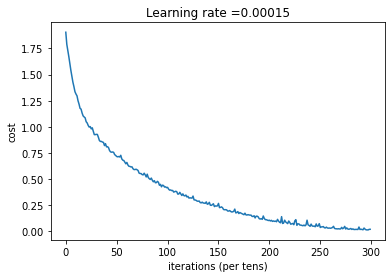

Parameters have been trained!
Train Accuracy: 1.0
Test Accuracy: 0.71666664


In [14]:
parameters = model(X_train, Y_train, X_test, Y_test)

Amazing, the algorithm can recognize a sign representing a figure between 0 and 5 with 71.7% accuracy.

**Insights**:
- The model seems big enough to fit the training set well. However, given the difference between train and test accuracy, I could try to add L2 or dropout regularization to reduce overfitting. 
- Think about the session as a block of code to train the model, for each time I run the session on a minibatch, it trains the parameters. In total I did run the session a large number of times (1500 epochs) until I obtained well trained parameters.

### Test with your own image

You can now take a picture of your hand and see the output of your model. To do that:

    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Write your image's name in the following code
    4. Run the code and check if the algorithm is right!

AttributeError: module 'tensorflow.compat.v1' has no attribute 'tf'

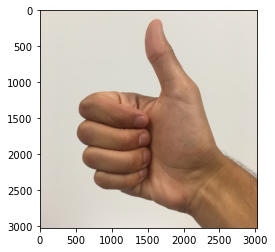

In [15]:
# importing libraries for the image procerssing
from PIL import Image
import cv2
import numpy as np

import imageio
image = imageio.imread('thumbs_up.jpg')
image.shape
plt.imshow(image)

# preprocessing your image to fit the algorithm.
#fname = my_image
#image = np.array(ndimage.imread(my_image, flatten=False))
my_image = cv2.resize(image, dsize=(64,64)).reshape((1, 64*64*3)).T
#my_image = resize(image, reshape((1, 64*64*3))).T
y_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("the algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

Although as you can see the algorithm seems to classify it incorrectly. The reason is that the training set doesn't contain any "thumbs-up", so the model doesn't know how to deal with it! We call that a "mismatched data distribution".